# GMGT Usage

This notebook illustrates the data structure and usage of the GMGT dataset(s).
Please have a look at the `README` file in this repo for downloading the data and installing the package
(or copying the `gmgt.py` file in your code).

This Notebook assumes that - regardless of your environment (Python module, Notebook) - you can import the `get_records` function as follows:

In [1]:
from gmgt import get_records

Let's use in this Notebook one of the three datasets currently implemented, `esm` (same for `kiknet_knet` and `ngawest2`). Assuming a path (change it in your code):

In [2]:
import os
file_path = os.path.join(os.path.expanduser('~'), 'datasets', 'esm.hdf')

## Record structure

For illustrative purposes (the code below is quite useless in normal processing), let us analyze the content
of the `get_record` iterator

In [6]:
for h1, h2, v, dt, meta in get_records(
    file_path,
    min_magnitude=7.5,  # only records with at least magnitude 7.5
    available_components=['HH', 'HHV']  # only records with at least the two horizontal components
):
    print(f'1st horizontal component (m/s^2, numpy array):\n{h1}\n')
    print(f'2nd horizontal component (m/s^2, numpy array):\n{h2}\n')
    print(f'vertical component (m/s^2, numpy array):\n{v}\n')
    print(f'dt (numpy float):\n{dt}\n')
    print(f'metadata (namedtuple):\n{meta}\n')
    
    # exit the loop, we want just to show the first record structure
    break

1st horizontal component (m/s^2, numpy array):
[-4.130e-06 -8.250e-06 -8.250e-06 ... -1.074e-05 -1.074e-05 -1.074e-05]

2nd horizontal component (m/s^2, numpy array):
[6.140e-06 1.228e-05 1.228e-05 ... 1.339e-05 1.339e-05 1.339e-05]

vertical component (m/s^2, numpy array):
[1.600e-06 3.210e-06 3.200e-06 ... 1.377e-05 1.377e-05 1.377e-05]

dt (numpy float):
0.005

metadata (namedtuple):
metadata(id=25, epicentral_distance=512.0, rupture_distance=nan, rupture_distance2=nan, joyner_boore_distance=nan, joyner_boore_distance2=nan, hypocentral_distance=512.0976469385502, fault_normal_distance=nan, fault_parallel_distance=nan, event_id='INT-20230206_0000222', origin_time=Timestamp('2023-02-06 10:24:49'), origin_time_resolution='s', event_latitude=38.11, event_longitude=37.24, magnitude=7.5, magnitude_type='Mw', event_depth=10.0, depth_to_top_of_fault_rupture=nan, fault_rupture_width=nan, dip=nan, dip2=nan, rake=nan, rake2=nan, strike=nan, strike2=nan, fault_type='Strike-Slip', station_id='KO

Note that you can access metadata fields (table columns) as normal Python attributes. for instance:

In [4]:
meta.magnitude

7.5

## Basic plotting

Plotting data should be done with care, as the code might hang for several hundreds of thousand of points.
As such, n the following example we focus only on high magnitudes, showing how to plot metadata and data

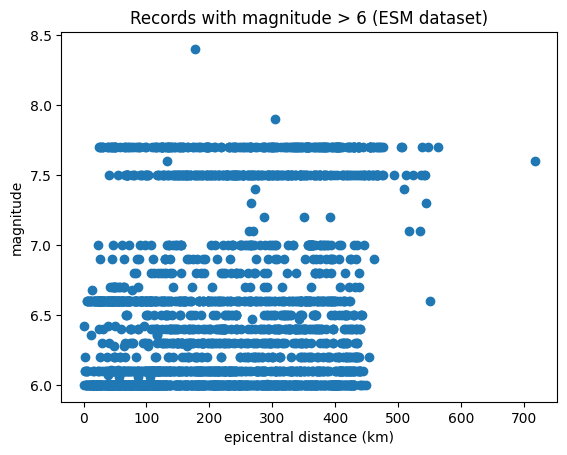

In [5]:
magnitudes = []
distances = []
for h1, h2, v, dt, meta in get_records(
    file_path,
    min_magnitude=6,  # only records with at least magnitude 7.5
    available_components=['HH', 'HHV']  # only records with at least the two horizontal components
):
    magnitudes.append(meta.magnitude)
    distances.append(meta.epicentral_distance)

from matplotlib import pyplot as plt
plt.scatter(distances, magnitudes)
plt.title('Records with magnitude > 6 (ESM dataset)')
plt.xlabel('epicentral distance (km)')
plt.ylabel('magnitude')
plt.show()

import numpy as np

plt.plot(np.ones(len(h1)) * dt, h1)
plt.title('Last read record (first horizontal component)')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.show()

